In [1]:
import numpy as np
import pandas as pd
import matplotlib
import scipy
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [ ]:
# Read in the galaxy catalog as a dataframe
df = pd.read_csv('df1.csv')

In [ ]:
df.ra

In [6]:
# Get x and y coordinates (ra and dec from the dataframe) into a
# numpy array to feed to the VT method
pos = np.array([list(i) for i in zip(df.ra, df.dec)])

In [ ]:
# Compute VT using scipy's Voronoi function
V = Voronoi(pos)

In [3]:
############################################################
# get_polyarea: calculate the area of a polygonal cell
def get_polyarea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

In [4]:
########################################################
# get_celldens: given a Voronoi Tessellation, return the 
#               cell "density", which in this case is the 
#               inverse of the cell area!
def get_celldens(V):
    cellx = []
    celly = []
    holdx = []
    holdy = []
    celldens = []
    for reg in V.regions:
        if -1 in reg:
            cellx.append([-1])
            celly.append([-1])
            celldens.append(-99)
        else:
            for num in reg:
                holdx.append(V.vertices[num][0])
                holdy.append(V.vertices[num][1])
            cellx.append(holdx)
            celly.append(holdy)
            cellarea = get_polyarea(holdx, holdy)
            if cellarea == 0:
                # In some rare cases, a computed cell area is 
                # zero. I'm not sure how this happens, but for 
                # now since it's extremely uncommon I'll just 
                # set the density to the null value
                celldens.append(-99)
            else:
                celldens.append(np.log10(1.0/float(cellarea)))
            holdx = []
            holdy = []
    return celldens

In [5]:
############################################################
# plot_voronoi: make a plot of the Voronoi cells. Optional 
#               inputs include a tuple for the xlim and ylim 
#               of the figure.
def plot_voronoi(V, *args, **kwargs):
    xlim = kwargs.get('xlim', None)
    ylim = kwargs.get('ylim', None)
    plt.figure(figsize=(14,8))
    for vind in V.ridge_vertices:
        (i1, i2) = sorted(vind)
        if (i1 != -1) & (i2 != -1):
            vor1 = V.vertices[i1]
            vor2 = V.vertices[i2]
            p, = plt.plot([vor1[0], vor2[0]], [vor1[1], vor2[1]], 'k-')
    plt.xlabel('Right Ascension (deg)', fontsize=18)
    plt.ylabel('Declination (deg)', fontsize=18)
    if xlim != None:
        plt.xlim(xlim)
    if ylim != None:
        plt.ylim(ylim)

In [8]:
# Calculate Voronoi cell densities (surface densities, which come 
# from the inverse of the cell areas). These are returned as the 
# base-10 log of the inverse of the cell surface areas. In the case 
# of an unbounded cell it's been set to -99, so be sure to exclude 
# those cases if you want to do any bulk statistical analysis with 
# the cell density distribution. Also note, as you'll see in the 
# figure below, there are a large number of cells that obviously are 
# subject to edge effects, and have unrealistically large areas. 

# I might try to flag any cell lying too close to the boundaries of 
# the distribution as unreliable. 
celldens = np.asarray(get_celldens(V))

In [ ]:
# Make a plot of the Voronoi cells. Note that it's pretty important 
# to specify the xlim and ylim for the figure, because the large 
# edge cells will otherwise set the default bounaries way too wide.

# Also note that it takes some time to render this figure (about 35 
# seconds on my laptop with several thousand VT cells)
plot_voronoi(V, xlim=(270,108), ylim=(-6,75))

KeyboardInterrupt: 

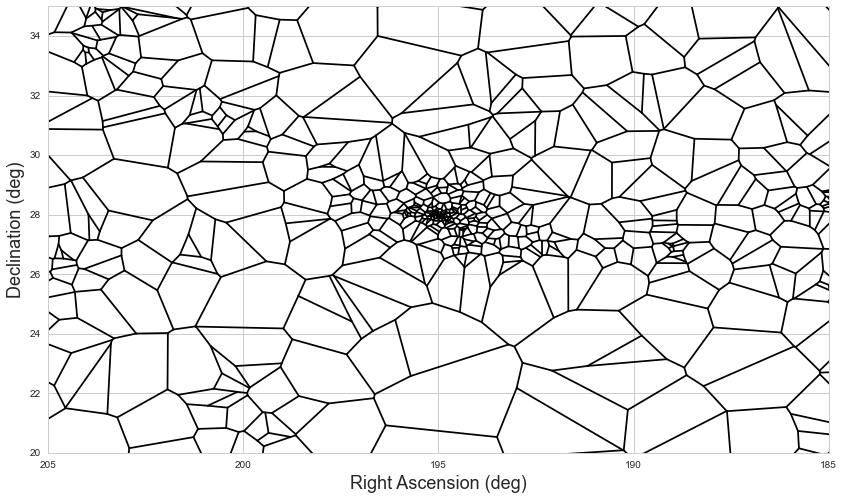

In [23]:
# And a zoomed-in plot near the Coma Cluster
plot_voronoi(V, xlim=(205,185), ylim=(20,35))